# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading data

In [2]:
BAC = pd.read_csv('BAC.csv')
C = pd.read_csv('C.csv')
GS = pd.read_csv('GS.csv')
JPM = pd.read_csv('JPM.csv')
MS = pd.read_csv('MS.csv')
WFC = pd.read_csv('WFC.csv')

In [3]:
BAC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,34.811729,16296700
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,34.442013,17757900
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,34.486385,14970700
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,34.434616,12599800
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,34.456806,15619400


In [4]:
# concating all the banks stocks
stocks = pd.concat([BAC, C, GS, JPM, MS, WFC])
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,34.811729,16296700
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,34.442013,17757900
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,34.486385,14970700
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,34.434616,12599800
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,34.456806,15619400


In [5]:
stocks.shape

(21138, 7)

# Checking for datatypes

In [6]:
stocks.dtypes   # date is in object type, it needs to be converted

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

# Checking for null values

In [8]:
stocks.isnull().sum()  # No null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Checking for duplicate values

In [9]:
stocks.duplicated().sum()  # No duplicates in the dataset

0

In [10]:
stocks = stocks.drop_duplicates()

# Visualisations

## Histogram

In [11]:
# Reset index to avoid any hidden index-related issues
stocks = stocks.reset_index(drop=True)

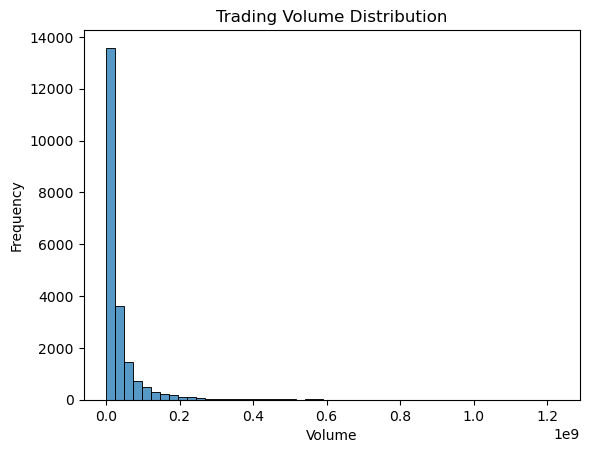

In [12]:
sns.histplot(data=stocks, x='Volume', bins = 50)
plt.title("Trading Volume Distribution")
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

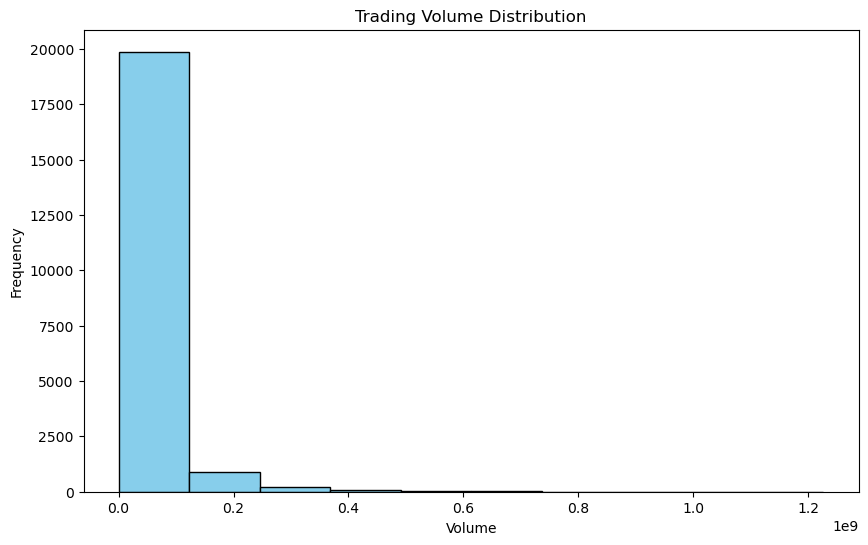

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(stocks['Volume'], bins=10, color='skyblue', edgecolor='black')
plt.title('Trading Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

## Line plot

In [14]:
# Checking for unique dates
stocks['Date'].value_counts() 

# Creating a new column year
stocks['Year'] = stocks['Date'].dt.year

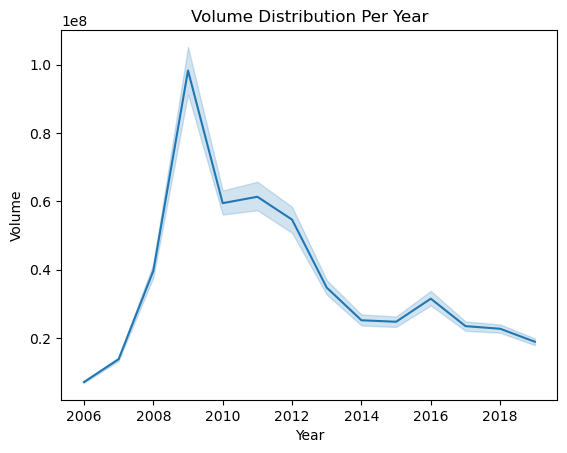

In [15]:
sns.lineplot(data=stocks, x='Year', y= 'Volume')
plt.title("Volume Distribution Per Year")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

# Barplot

In [16]:
# Reshape the data to long format
stocks_long = stocks.melt(id_vars='Year', value_vars=['Open', 'Close'], var_name='Price Type', value_name='Price')
stocks_long.groupby(['Year', 'Price Type'])[['Price']].sum()

Price
Year Price Type               
2006 Close       211773.329875
     Open        211698.179774
2007 Close       224199.769818
     Open        224545.479806
2008 Close       120886.420045
     Open        121304.409968
2009 Close        69489.699998
     Open         69538.359910
2010 Close        76998.889982
     Open         77064.869909
2011 Close        67360.110098
     Open         67489.870039
2012 Close        60019.719969
     Open         59946.980034
2013 Close        84692.240018
     Open         84639.970035
2014 Close        96047.889993
     Open         96039.020219
2015 Close       105161.030031
     Open        105199.999994
2016 Close        94590.760062
     Open         94472.519965
2017 Close       129797.259911
     Open        129838.730003
2018 Close       137608.390002
     Open        137828.600040
2019 Close       128176.660030
     Open        128020.100080

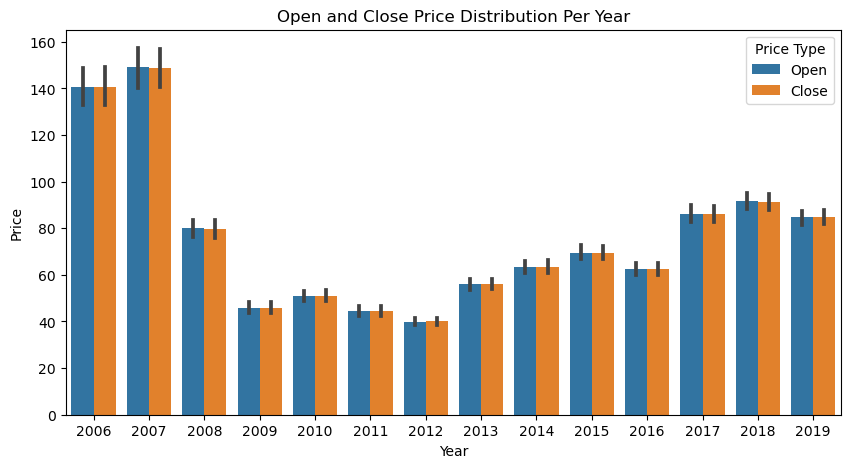

In [17]:
plt.figure(figsize = (10,5))
sns.barplot(data=stocks_long, x='Year', y= 'Price', hue = 'Price Type')
plt.title("Open and Close Price Distribution Per Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [18]:
avg_volume = stocks.groupby('Year')[['Volume']].mean().reset_index()
avg_volume

,Year,Volume
0,2006,7.048792e+06
1,2007,1.375031e+07
2,2008,3.960837e+07
3,2009,9.825894e+07
4,2010,5.942824e+07
5,2011,6.129724e+07
6,2012,5.460710e+07
7,2013,3.469160e+07
8,2014,2.514010e+07
9,2015,2.470418e+07


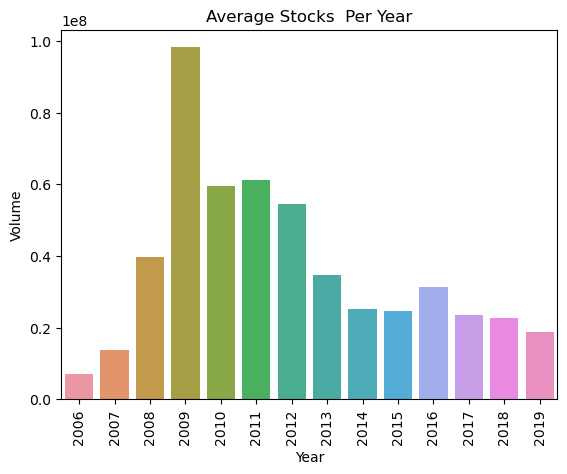

In [19]:
sns.barplot(data=avg_volume, x='Year', y= 'Volume')
plt.title("Average Stocks  Per Year")
plt.xlabel("Year")
plt.xticks(rotation = 90)
plt.ylabel("Volume")
plt.show()

# violin Plot

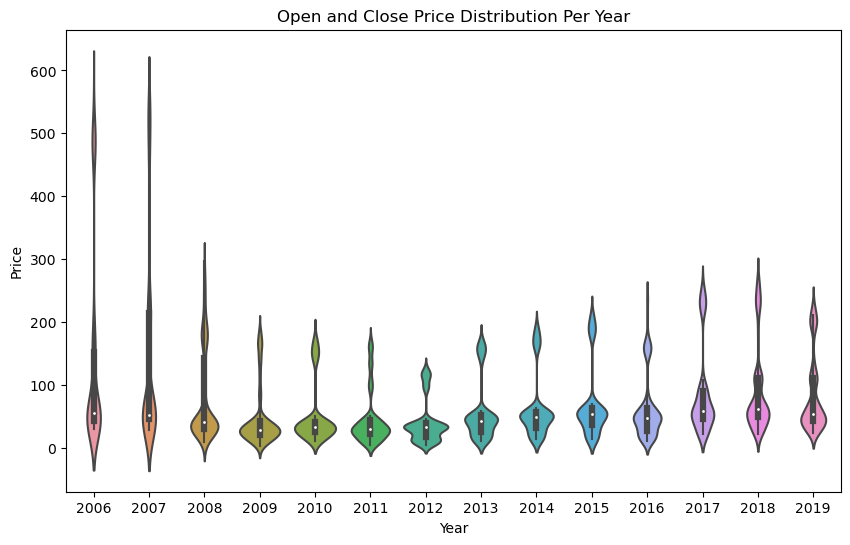

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=stocks_long, x='Year', y= 'Price')
plt.title("Open and Close Price Distribution Per Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

# Scatter Plot

In [21]:
# Grouping year with respect to avg of high and low
yearly_means = stocks.groupby('Year').agg({'High': 'mean', 'Low': 'mean'}).reset_index()
yearly_means

,Year,High,Low
0,2006,141.633559,139.551703
1,2007,150.743785,147.127988
2,2008,82.140692,77.377141
3,2009,46.977725,44.926283
4,2010,51.589550,50.286482
5,2011,45.203737,43.970033
6,2012,40.459313,39.523727
7,2013,56.486931,55.489187
8,2014,63.992288,63.056270
9,2015,70.130093,68.958962


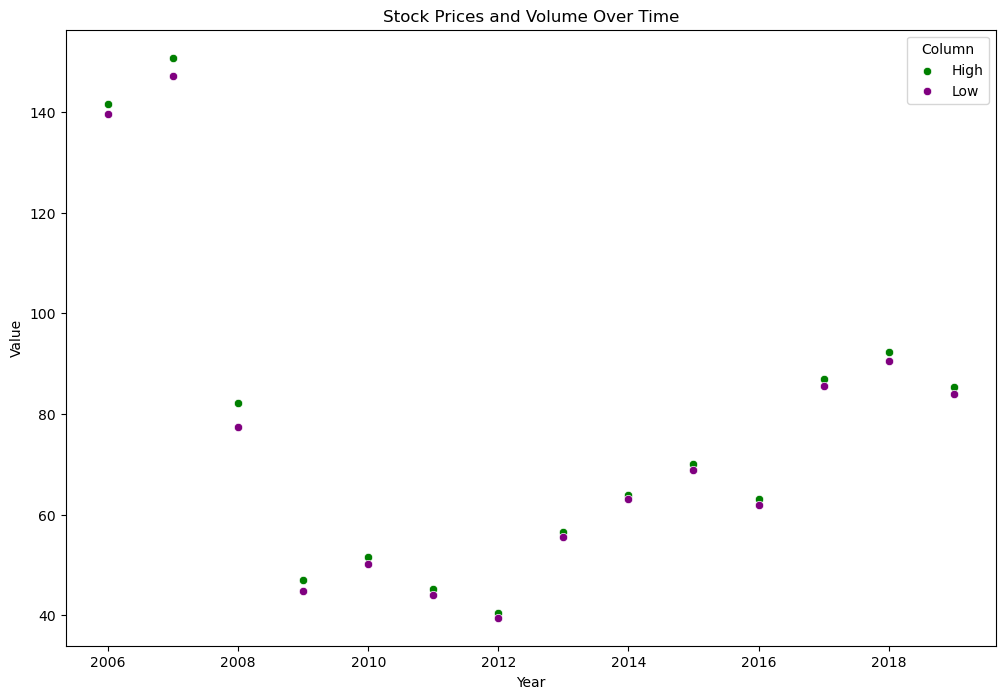

In [22]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=yearly_means, x='Year', y='High', color='green', label='High')
sns.scatterplot(data=yearly_means, x='Year', y='Low', color='purple', label='Low')

# Add titles and labels
plt.title("Stock Prices and Volume Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(title="Column")
plt.show()

# Stacked bar Plot

In [26]:
yearly_means = stocks.groupby('Year').agg({'Open': 'mean', 'Close': 'mean'}).reset_index()
yearly_means

,Year,Open,Close
0,2006,140.569840,140.619741
1,2007,149.100584,148.871029
2,2008,79.910679,79.635323
3,2009,45.990979,45.958796
4,2010,50.968829,50.925192
5,2011,44.636157,44.550337
6,2012,39.964653,40.013147
7,2013,55.978816,56.013386
8,2014,63.517871,63.523737
9,2015,69.576720,69.550946


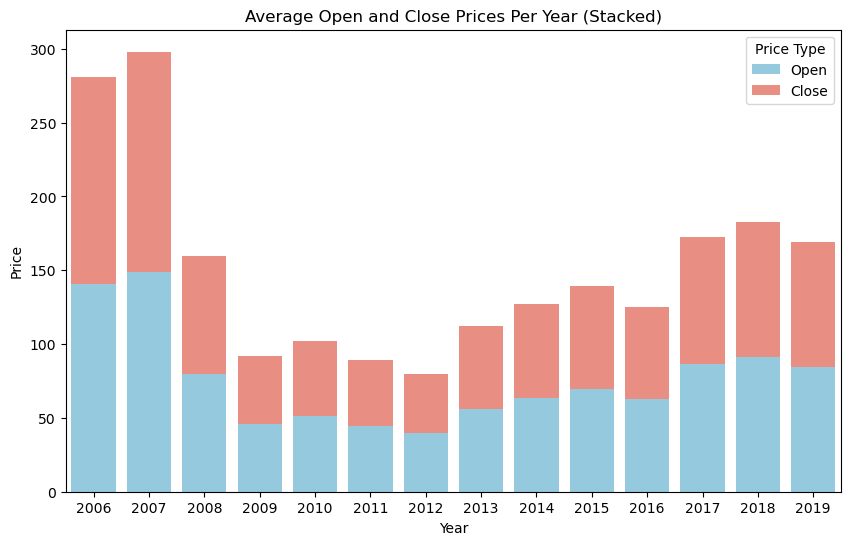

In [27]:
plt.figure(figsize=(10, 6))


sns.barplot(data=yearly_means, x='Year', y='Open', color='skyblue', label='Open')
sns.barplot(data=yearly_means, x='Year', y='Close', color='salmon', label='Close', bottom=yearly_means['Open'])

plt.title("Average Open and Close Prices Per Year (Stacked)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="Price Type")

plt.show()

# Stack Plot

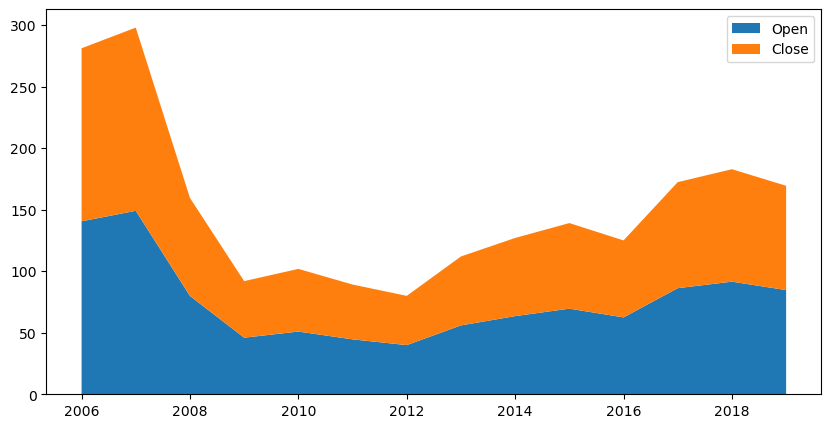

In [33]:
plt.figure(figsize=(10,5))
plt.stackplot(yearly_means['Year'], yearly_means['Open'], yearly_means['Close'], labels = ['Open', 'Close'])
plt.legend(loc = 'upper right')
plt.show()

# Pie chart

In [38]:
# Year wise volume
avg_volume = stocks.groupby('Year')[['Volume']].mean().reset_index()
avg_volume

,Year,Volume
0,2006,7.048792e+06
1,2007,1.375031e+07
2,2008,3.960837e+07
3,2009,9.825894e+07
4,2010,5.942824e+07
5,2011,6.129724e+07
6,2012,5.460710e+07
7,2013,3.469160e+07
8,2014,2.514010e+07
9,2015,2.470418e+07


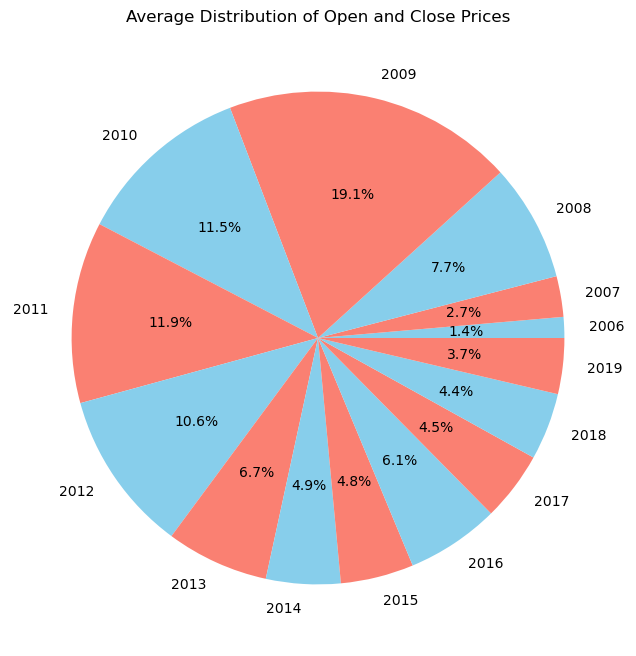

In [39]:
plt.figure(figsize=(8, 8))
plt.pie(avg_volume['Volume'], labels=avg_volume['Year'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Average Distribution of Open and Close Prices")
plt.show()

# Sub-plots

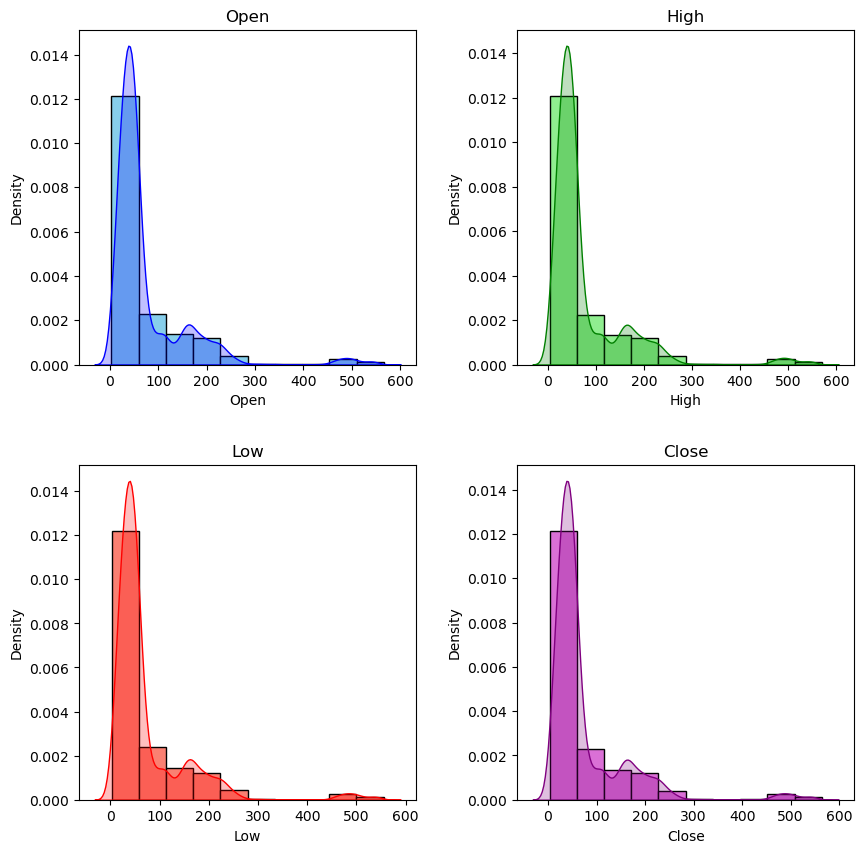

In [47]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.subplot(2, 2, 1)
plt.hist(stocks['Open'], density=True, color='skyblue', edgecolor='black', bins=10)
sns.kdeplot(stocks['Open'], color='blue', fill=True)
plt.title('Open')

plt.subplot(2, 2, 2)
plt.hist(stocks['High'], density=True, color='lightgreen', edgecolor='black', bins=10)
sns.kdeplot(stocks['High'], color='green', fill=True)
plt.title('High')

plt.subplot(2, 2, 3)
plt.hist(stocks['Low'], density=True, color='salmon', edgecolor='black', bins=10)
sns.kdeplot(stocks['Low'], color='red', fill=True)
plt.title('Low')

plt.subplot(2, 2, 4)
plt.hist(stocks['Close'], density=True, color='orchid', edgecolor='black', bins=10)
sns.kdeplot(stocks['Close'], color='purple', fill=True)
plt.title('Close')

plt.show()

# Heatmap

In [48]:
stocks.corr()

,Open,High,Low,Close,Adj Close,Volume,Year
Open,1.000000,0.999876,0.999846,0.999777,0.997615,-0.303007,-0.104979
High,0.999876,1.000000,0.999739,0.999861,0.997635,-0.302355,-0.107024
Low,0.999846,0.999739,1.000000,0.999874,0.997783,-0.304007,-0.102263
Close,0.999777,0.999861,0.999874,1.000000,0.997831,-0.303225,-0.104550
Adj Close,0.997615,0.997635,0.997783,0.997831,1.000000,-0.297083,-0.053921
Volume,-0.303007,-0.302355,-0.304007,-0.303225,-0.297083,1.000000,-0.094810
Year,-0.104979,-0.107024,-0.102263,-0.104550,-0.053921,-0.094810,1.000000


Text(0.5, 1.0, 'Heatmap of Stocks')

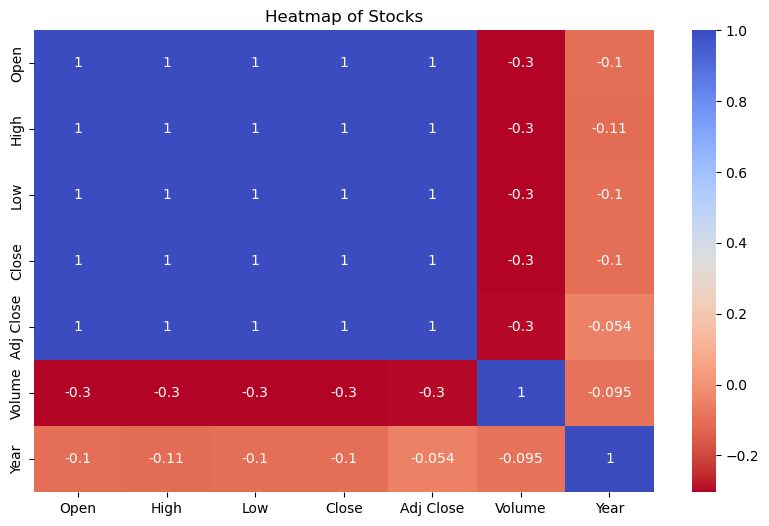

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(data = stocks.corr(), cmap = 'coolwarm_r', annot = True)
plt.title('Heatmap of Stocks')

# Join Plots

<Figure size 1000x500 with 0 Axes>

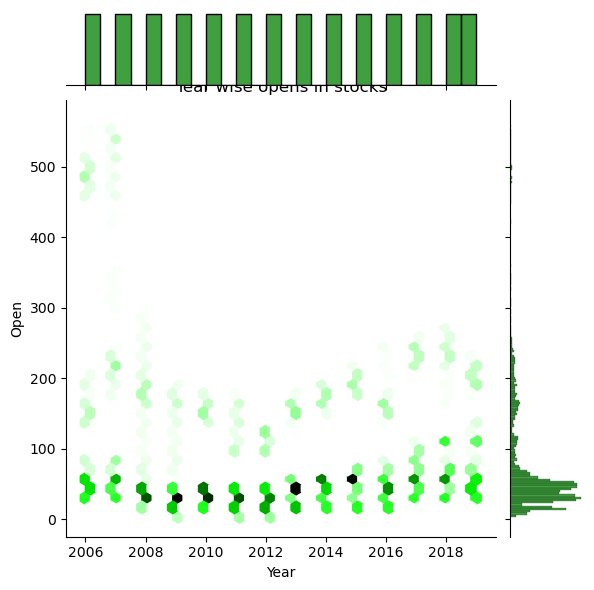

In [62]:
plt.figure(figsize=(10,5))
sns.jointplot(x=stocks['Year'],y=stocks['Open'],data=stocks,kind='hex',color='green')
plt.title('Year wise opens in stocks')
plt.show()

In [1]:
pwd

'C:\\Users\\user\\Python projects\\Visualisations'